In [66]:
# imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


Part 1

In [67]:
file_path = Path("Resources/myopia.csv")
myopia = pd.read_csv(file_path)
myopia.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [68]:
# List dataframe data types
myopia.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [69]:
# Find null values
for column in myopia.columns:
    print(f"Column {column} has {myopia[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values
Column MYOPIC has 0 null values


In [70]:
# Delete MYOPIC column
myopia_no_myopic = myopia.drop(columns=["MYOPIC"])
myopia_no_myopic

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [71]:
# Standarise data with StandarScaler
myopia_scaled = StandardScaler().fit_transform(myopia_no_myopic)
print(myopia_scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


Part 2

In [72]:
# Perform dimensionality reduction with PCA to reduce dimensions to preserve 90% of the explained variance 

# Initialise PCA model
pca = PCA(n_components=0.9)
myopia_pca = pca.fit_transform(myopia_scaled)

In [73]:
#showing the reduced data set after preserving 90% of the data
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

How did the number of the features change?
The features were reduced from 14 features to 10 features, while maintaining 90% of the data

In [88]:
#reduce data dimensions with t-SNE
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(myopia_pca)


C:\Users\nickj\anaconda3\anacondatake2\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(618, 2)

In [89]:
# The dataset has been reduced to 2 columns
transformed_features.shape

(618, 2)

In [90]:
myopia_no_myopic["x"] = transformed_features[:,0]
myopia_no_myopic["y"] = transformed_features[:,1]
myopia_no_myopic["class"] = myopia["MYOPIC"]

In [92]:
# new dataframe
myopia_no_myopic

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,x,y,class
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,6.398302,-1.734895,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,20.802195,8.968618,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,-12.570002,-14.167592,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,-3.224672,12.175439,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,16.916140,-20.109503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,11.001316,-5.455032,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,21.336704,8.551229,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,22.251333,7.593586,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,-16.139818,-9.389259,0


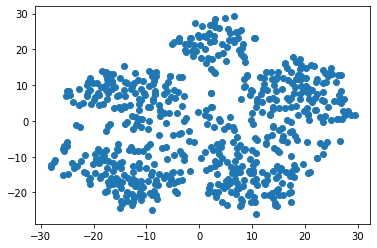

In [93]:
# Create a scatter plot of the t-SNE output
plt.scatter(myopia_no_myopic["x"], myopia_no_myopic["y"])
plt.show()

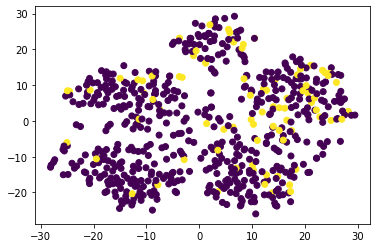

In [94]:
plt.scatter(myopia_no_myopic["x"], myopia_no_myopic["y"], c=myopia_no_myopic["class"])
plt.show()

Part 3

C:\Users\nickj\anaconda3\anacondatake2\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


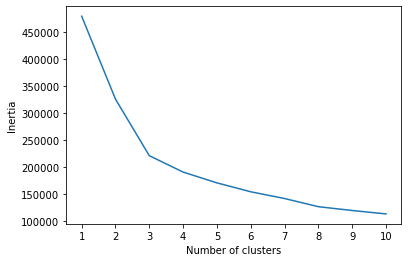

In [79]:
# Create an elbow plot to identify the best number of clusters

inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_no_myopic)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [81]:
# Define a DataFrame to plot the Elbow Curve using hvPlot

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,478836.543941
1,2,325321.995374
2,3,220628.369437
3,4,190292.481839
4,5,170303.927267
5,6,153811.366083
6,7,141325.703418
7,8,126197.006438
8,9,119150.638395
9,10,112825.745134


In [83]:
model = KMeans(n_clusters=3, random_state=5)
model.fit(myopia_no_myopic)

KMeans(n_clusters=3, random_state=5)

In [85]:
# Get predictions
predictions = model.predict(myopia_no_myopic)
print(predictions)

[1 0 2 2 0 1 2 2 2 2 1 0 2 2 0 2 2 1 1 2 2 2 2 1 2 2 0 0 0 0 0 1 0 2 0 1 1
 2 2 2 0 2 1 2 0 2 1 2 0 1 0 2 2 0 2 2 0 0 2 2 2 0 1 2 1 1 2 2 2 0 1 2 1 1
 2 0 2 1 2 2 0 2 0 0 2 0 0 1 0 0 2 2 0 2 2 1 2 0 0 1 1 2 1 2 1 1 2 2 0 2 1
 2 2 0 0 0 2 2 0 2 0 2 0 2 1 1 2 0 0 0 0 2 1 2 0 2 2 0 2 1 0 2 0 2 0 0 2 1
 0 1 0 2 1 0 2 2 0 0 0 0 2 2 2 2 0 2 1 2 1 2 0 0 1 2 0 2 0 0 1 0 2 1 2 0 2
 1 0 0 2 0 0 0 0 2 0 1 2 2 0 1 0 0 2 2 2 0 0 2 0 0 1 0 0 0 0 0 1 2 2 1 0 2
 1 2 2 1 1 2 2 2 1 1 0 1 0 0 0 1 2 2 1 0 0 2 0 2 0 0 1 2 1 1 0 1 0 0 0 0 1
 2 1 2 0 0 0 2 0 0 2 2 2 2 1 1 2 0 2 0 1 0 0 1 0 1 0 0 2 1 2 2 2 2 0 2 1 2
 2 2 1 2 2 0 1 1 0 0 1 2 2 1 1 0 2 0 0 0 0 2 0 1 2 0 0 1 0 2 2 0 2 2 2 0 2
 0 0 2 0 0 1 2 1 2 2 0 0 0 0 1 1 2 0 2 0 2 2 2 0 2 1 2 0 0 2 2 2 0 2 2 2 2
 0 2 2 0 1 0 2 1 0 2 1 0 2 2 0 1 2 1 1 1 0 1 2 0 0 2 2 0 2 2 2 2 1 1 1 2 1
 1 1 1 0 0 0 1 2 2 0 2 2 2 0 1 2 0 1 0 2 1 0 2 1 0 2 0 0 1 0 1 0 1 0 0 2 1
 0 2 2 0 2 1 1 1 0 1 2 1 2 2 0 2 0 2 2 0 1 2 0 1 2 1 0 1 2 0 1 0 0 2 2 1 0
 0 0 1 2 0 2 1 0 1 1 2 2 

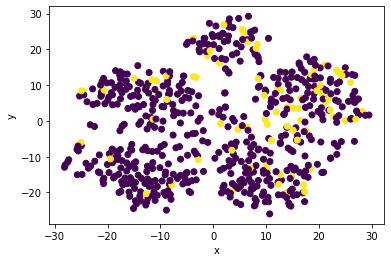

In [95]:
plt.scatter(x=myopia_no_myopic["x"], y=myopia_no_myopic['y'], c=myopia_no_myopic['class'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

As you can see from the above Elbow plot graph, the most suitable number of clusters is 3

Findings
To perform this unsupervised machine learning case study, I scaled the data, performed dimensionality reduction using PCA to reduce the data analysed to 90%, then perfomred t_SNE to reduce the columns which resulted in two columns. As you can see from the above scatter plot,there are no distinct clusters which means that patients cannont be clustered together.   